In [1]:
import segmentation_models_pytorch as smp

model = smp.Unet()

d:\mamba\envs\sww-prod\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io
from skimage.segmentation import chan_vese
import os

In [3]:
image_dir = "data\Dataset"

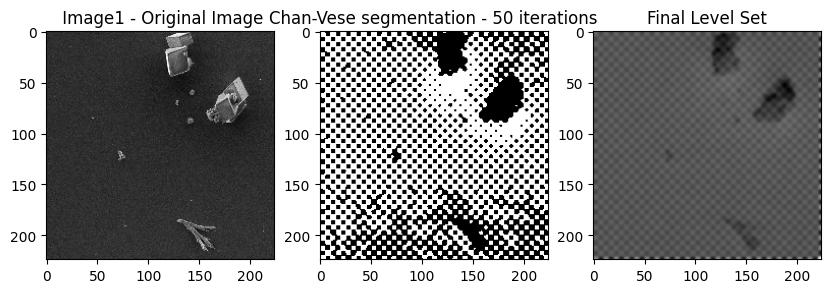

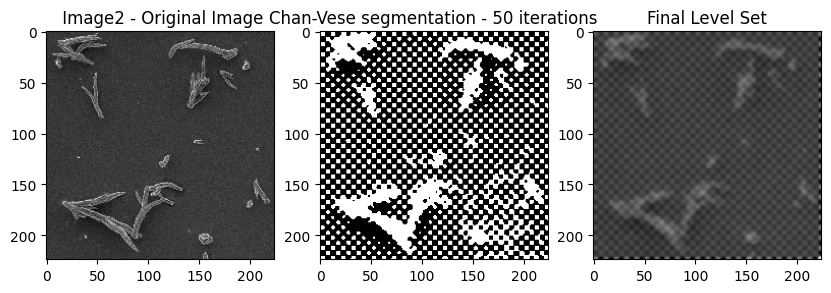

In [4]:
image_files = [file for file in os.listdir(image_dir) if file.endswith(".tif")]


for i, image_file in enumerate(image_files[:2]):
    fig, axes = plt.subplots(1, 3, figsize=(10,50))
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    gray = rgb2gray(image)
    chanvese_gray_astronaut = chan_vese(gray,
									max_num_iter=100,
									extended_output=True)
    ax = axes.flatten()
    ax[0].imshow(gray, cmap="gray")
    ax[0].set_title(f" Image{i+1} - Original Image")
    ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
    title = "Chan-Vese segmentation - {} iterations".format(len(chanvese_gray_astronaut[2]))
    ax[1].set_title(title)
    ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
    ax[2].set_title("Final Level Set")
    plt.show()


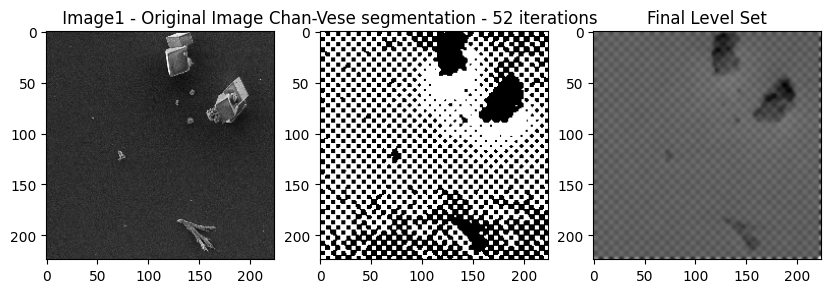

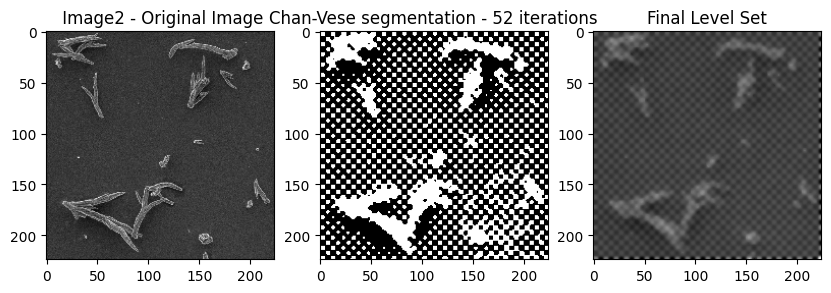

In [5]:
image_files = [file for file in os.listdir(image_dir) if file.endswith(".tif")]

for i, image_file in enumerate(image_files[:2]):
    fig, axes = plt.subplots(1, 3, figsize=(10,50))
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    gray = rgb2gray(image)
    chanvese_gray_astronaut = chan_vese(gray,mu=0.2, lambda1=1, lambda2=1, tol=1e-3,
									max_num_iter=120,dt=0.5, init_level_set="checkerboard",
									extended_output=True)
    #cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               #max_num_iter=200, dt=0.5, init_level_set="checkerboard",
              # extended_output=True)
    
    
    ax = axes.flatten()
    ax[0].imshow(gray, cmap="gray")
    ax[0].set_title(f" Image{i+1} - Original Image")
    ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
    title = "Chan-Vese segmentation - {} iterations".format(len(chanvese_gray_astronaut[2]))
    ax[1].set_title(title)
    ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
    ax[2].set_title("Final Level Set")
    plt.show()


In [63]:
from skimage.segmentation import slic
from skimage.color import label2rgb
import skimage
import numpy as np

In [155]:
blurred_image_list = []

for i, image_file in enumerate(image_files):
    print(f"Processing image {i+1}: {image_file}")
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    gray_image = skimage.color.rgb2gray(image)
    blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)
    blurred_image_list.append(blurred_image)

blurred_image_stack = np.stack(blurred_image_list)


Processing image 1: 0.tif
Processing image 2: 1.tif
Processing image 3: 10.tif
Processing image 4: 100.tif
Processing image 5: 101.tif
Processing image 6: 102.tif
Processing image 7: 103.tif
Processing image 8: 104.tif
Processing image 9: 105.tif
Processing image 10: 106.tif
Processing image 11: 107.tif
Processing image 12: 108.tif
Processing image 13: 109.tif
Processing image 14: 11.tif
Processing image 15: 110.tif
Processing image 16: 111.tif
Processing image 17: 112.tif
Processing image 18: 113.tif
Processing image 19: 114.tif
Processing image 20: 115.tif
Processing image 21: 116.tif
Processing image 22: 117.tif
Processing image 23: 118.tif
Processing image 24: 119.tif
Processing image 25: 12.tif
Processing image 26: 120.tif
Processing image 27: 121.tif
Processing image 28: 122.tif
Processing image 29: 123.tif
Processing image 30: 124.tif
Processing image 31: 125.tif
Processing image 32: 126.tif
Processing image 33: 127.tif
Processing image 34: 128.tif
Processing image 35: 129.tif
P

(0.0, 1.0)

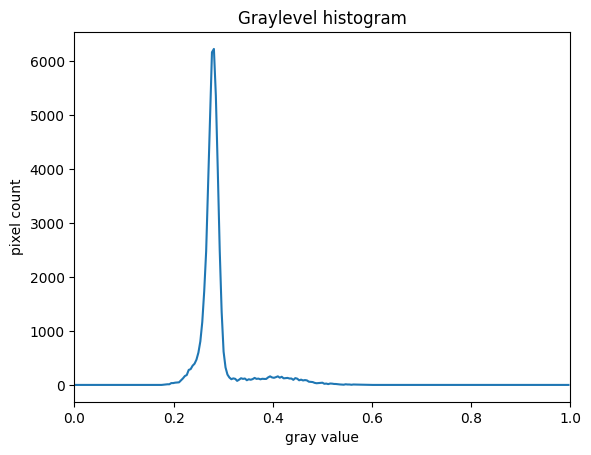

In [152]:
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)

In [175]:
mask_stack = np.zeros_like(blurred_image_stack, dtype=bool)
for i, image in enumerate(blurred_image_stack):
    t = skimage.filters.threshold_otsu(image)
    mask_stack[i] = image > t
    print("Found automatic threshold t = {}.".format(t))

mask_stack.shape

Found automatic threshold t = 0.39617014546771584.
Found automatic threshold t = 0.3508116683386916.
Found automatic threshold t = 0.4037102681637714.
Found automatic threshold t = 0.3382285789215256.
Found automatic threshold t = 0.3869145831093115.
Found automatic threshold t = 0.3172063961377807.
Found automatic threshold t = 0.34531768626571574.
Found automatic threshold t = 0.34013216088383946.
Found automatic threshold t = 0.3049786063006513.
Found automatic threshold t = 0.2891598337544581.
Found automatic threshold t = 0.2872056613130729.
Found automatic threshold t = 0.2964935171562525.
Found automatic threshold t = 0.290401469468391.
Found automatic threshold t = 0.2939575400039388.
Found automatic threshold t = 0.27473807908872017.
Found automatic threshold t = 0.3178984864338625.
Found automatic threshold t = 0.29631679930949206.
Found automatic threshold t = 0.254377125111118.
Found automatic threshold t = 0.2815043660861116.
Found automatic threshold t = 0.271935415358715

(215, 224, 224)

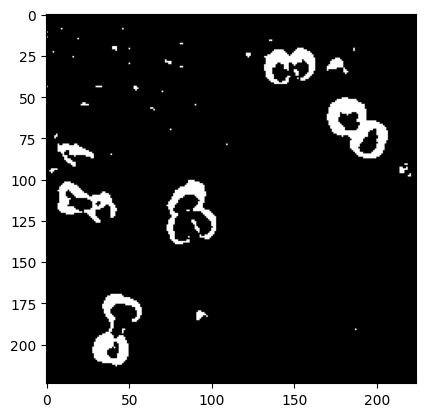

In [172]:
fig, ax = plt.subplots()
plt.imshow(mask_stack[80], cmap="gray")

In [183]:
selection_list = []
for i, image_file in enumerate(image_files):
    bin_mask = mask_stack[i]
    image_file = image_files[i]
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    selection = image.copy()
    selection[~bin_mask] = 0
    selection_list.append(selection)

mask_stack = mask_stack.astype(np.uint8)

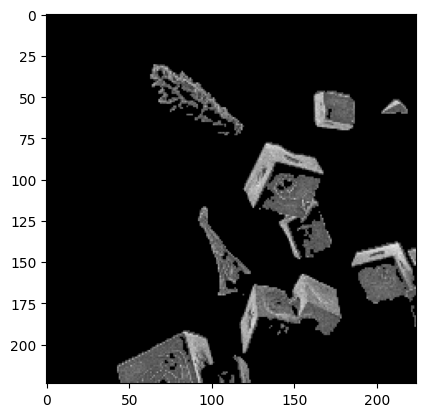

In [185]:
fig, ax = plt.subplots()
plt.imshow(selection_list[3])

In [191]:
import cv2
import numpy as np

output_dir = "images/"

for i, image_file in enumerate(image_files):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_stack[i])

    for label in range(1, num_labels):
        x, y, width, height, area = stats[label]

        object_mask = (labels == label)
        
        tmp = selection_list[i].copy()
        tmp[~object_mask] = 0
        object_mask = object_mask.astype(np.uint8) * 255

        cropped_object = tmp[y:y+height, x:x+width]

        if height * width > 255:
            blank_img = 255 * np.zeros(shape=[224, 224, 3], dtype=np.uint8)
            imageX = 112 - int(width / 2)
            imageY = 112 - int(height / 2)

            blank_img[imageY:imageY + height, imageX:imageX + width] = cropped_object
            output_filename = f"object_{i}_{label}.png"
            cv2.imwrite(output_dir+output_filename, blank_img)


In [143]:
slic_pictures = []

for i, image_file in enumerate(image_files):
	print(f"Processing image {i+1}: {image_file}")

	image_path = os.path.join(image_dir, image_file)
	image = io.imread(image_path)
	
	segments = slic(image,
						n_segments=2000,
						compactness=5, sigma = 1)

	slic_pictures.append(segments)

slic_stack = np.stack(slic_pictures)
slic_stack.shape


Processing image 1: 0.tif
Processing image 2: 1.tif
Processing image 3: 10.tif
Processing image 4: 100.tif
Processing image 5: 101.tif
Processing image 6: 102.tif
Processing image 7: 103.tif
Processing image 8: 104.tif
Processing image 9: 105.tif
Processing image 10: 106.tif
Processing image 11: 107.tif
Processing image 12: 108.tif
Processing image 13: 109.tif
Processing image 14: 11.tif
Processing image 15: 110.tif
Processing image 16: 111.tif
Processing image 17: 112.tif
Processing image 18: 113.tif
Processing image 19: 114.tif
Processing image 20: 115.tif
Processing image 21: 116.tif
Processing image 22: 117.tif
Processing image 23: 118.tif
Processing image 24: 119.tif
Processing image 25: 12.tif
Processing image 26: 120.tif
Processing image 27: 121.tif
Processing image 28: 122.tif
Processing image 29: 123.tif
Processing image 30: 124.tif
Processing image 31: 125.tif
Processing image 32: 126.tif
Processing image 33: 127.tif
Processing image 34: 128.tif
Processing image 35: 129.tif
P

(215, 224, 224)

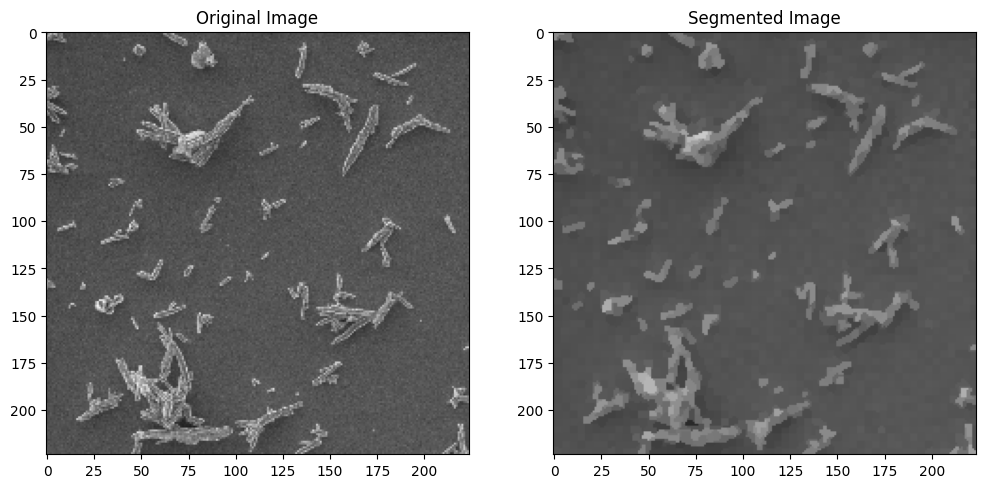

In [137]:
i = 2

plt.figure(figsize=(12, 6))

image_path = os.path.join(image_dir, image_files[i])
image = io.imread(image_path)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
segmented_image = label2rgb(slic_stack[i], image, kind="avg")
plt.imshow(segmented_image)
plt.title("Segmented Image")

plt.show()


In [138]:
img_gray_list = []

for i, slic_image in enumerate(slic_stack):
    image_file = image_files[i]
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    img_segmented = label2rgb(slic_image, image, kind = 'avg')
    img_gray = skimage.color.rgb2gray(img_segmented)
    img_gray_list.append(img_gray)

In [139]:
img_gray_stack = np.stack(img_gray_list)

In [140]:
t = 0.31

mask_stack = np.zeros_like(img_gray_stack, dtype=bool)
for i, image in enumerate(img_gray_list):
    mask_stack[i] = image < t

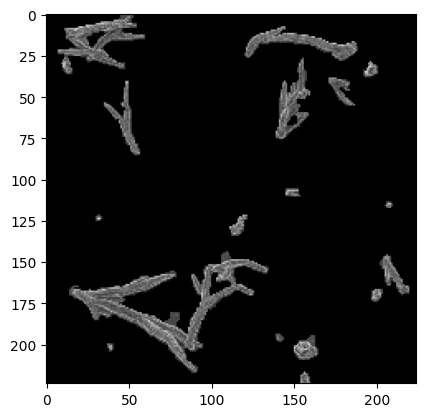

In [55]:
for i, image_file in enumerate(image_files):
    image_file = image_files[i]
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    selection = image.copy()
    selection[~bin_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

In [59]:
import cv2
import numpy as np

bin_mask = bin_mask.astype(np.uint8)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bin_mask)

for i, image_file in enumerate(image_files):


    for label in range(1, num_labels):
        # Extract the bounding box coordinates of the object
        x, y, width, height, area = stats[label]

        object_mask = (labels == label)
        #print(selection.shape)
        tmp = selection.copy()
        tmp[~object_mask] = 0
        object_mask = object_mask.astype(np.uint8) * 255
        # Crop the object from the original image
        cropped_object = tmp[y:y+height, x:x+width]

        #bin_mask2 = cropped_object
        if height * width > 255:
            # Save the cropped object to a separate PNG file
            output_filename = f"object_{label}.png"
            cv2.imwrite(output_filename, cropped_object)

            # Optionally, you can also save the binary mask for each object

            object_mask_filename = f"object_{label}_mask.png"
            #cv2.imwrite(object_mask_filename, object_mask)


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-segmentation", model="CIDAS/clipseg-rd64-refined")

In [ ]:
# Load model directly
from transformers import AutoProcessor, CLIPSegForImageSegmentation

processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

In [ ]:
from transformers import AutoProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests

ImportError: cannot import name 'CLIPSegForImageSegmentation' from 'transformers' (c:\Users\waren\mambaforge\envs\cc\lib\site-packages\transformers\__init__.py)

In [ ]:
processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

texts = ["particle"]
for i, image_file in enumerate(image_files[:1]):
    image = io.imread(image_path)
    texts = ["particle"]
    inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")
    outputs = model(**inputs)

    logits = outputs.logits
print(logits.shape)

c:\Users\waren\mambaforge\envs\cc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'CLIPSegForImageSegmentation' from 'transformers' (c:\Users\waren\mambaforge\envs\cc\lib\site-packages\transformers\__init__.py)